<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/18_Keras_Callbacks_Cats_Vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
!gdown --id 1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip
!unzip -q test1.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Dvw0UpvItjig0JbnzbTgYKB-ibMrXdxk
To: /content/dogs-vs-cats.zip
100% 852M/852M [00:13<00:00, 60.9MB/s]


In [3]:
IMAGE_WIDTH = 60
IMAGE_HEIGHT = 60
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

In [4]:
filenames = os.listdir('./train')

categories = []

for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append(1)
  else:
    categories.append(0)

df = pd.DataFrame({'filename': filenames, 'class': categories})
df.head()

,filename,class
0,cat.8055.jpg,0
1,cat.3781.jpg,0
2,dog.10449.jpg,1
3,cat.1412.jpg,0
4,cat.5753.jpg,0


<Axes: >

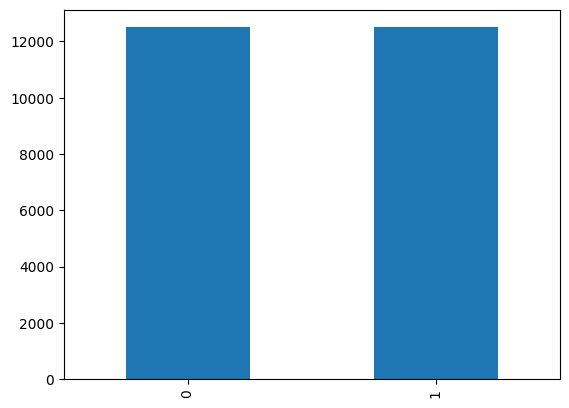

In [5]:
df['class'].value_counts().plot.bar()

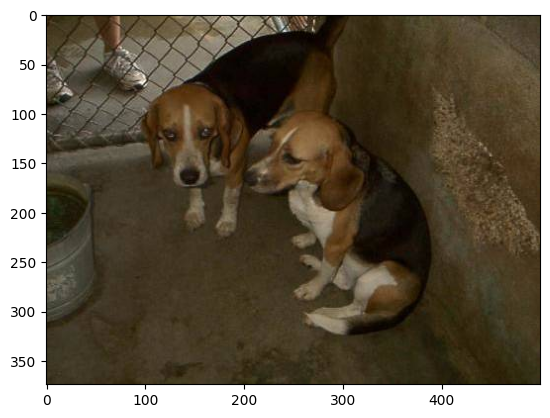

In [6]:
sample = random.choice(filenames)
image = load_img('./train/'+sample)
plt.imshow(image)

In [7]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0

**Creating our Data Generator**

In [8]:
df['class'] = df['class'].replace({0: 'cat', 1: 'dog'})
df.head()

,filename,class
0,cat.8055.jpg,cat
1,cat.3781.jpg,cat
2,dog.10449.jpg,dog
3,cat.1412.jpg,cat
4,cat.5753.jpg,cat


In [9]:
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=7)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [10]:
train_df.head()

,filename,class
0,dog.9915.jpg,dog
1,cat.4627.jpg,cat
2,dog.3272.jpg,dog
3,dog.2026.jpg,dog
4,cat.4973.jpg,cat


In [11]:
validate_df.head()

,filename,class
0,dog.11818.jpg,dog
1,dog.6533.jpg,dog
2,cat.6246.jpg,cat
3,dog.7507.jpg,dog
4,dog.12228.jpg,dog


**Creating Data Generator**

In [12]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(train_df, './train/', x_col='filename', y_col='class',
                                                    target_size=IMAGE_SIZE, class_mode='categorical', batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [13]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(validate_df, './train/', x_col='filename', y_col='class',
                                                    target_size=IMAGE_SIZE, class_mode='categorical', batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


**Creating an example Data Generator to load a single image**

In [15]:
example_df = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(example_df, './train/', x_col='filename', y_col='class',
                                                    target_size=IMAGE_SIZE, class_mode='categorical', batch_size=batch_size)

Found 1 validated image filenames belonging to 1 classes.


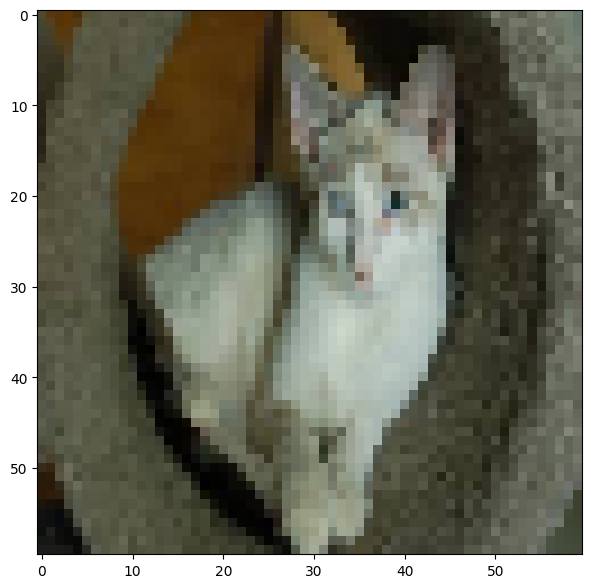

In [18]:
plt.figure(figsize=(6,6))

for X_batch, Y_batch in example_generator:
  image = X_batch[0]
  plt.imshow(image)
  break

plt.tight_layout()
plt.show()

In [19]:
epochs = 10

history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator,
                    validation_steps=5000//batch_size, steps_per_epoch=20000//batch_size)

Epoch 1/10
625/625 [==============================] - 50s 61ms/step - loss: 0.6277 - accuracy: 0.6388 - val_loss: 0.5430 - val_accuracy: 0.7296
Epoch 2/10
625/625 [==============================] - 41s 66ms/step - loss: 0.5093 - accuracy: 0.7498 - val_loss: 0.4814 - val_accuracy: 0.7704
Epoch 3/10
625/625 [==============================] - 40s 63ms/step - loss: 0.4519 - accuracy: 0.7838 - val_loss: 0.4298 - val_accuracy: 0.7999
Epoch 4/10
625/625 [==============================] - 40s 63ms/step - loss: 0.4027 - accuracy: 0.8148 - val_loss: 0.4289 - val_accuracy: 0.7983
Epoch 5/10
625/625 [==============================] - 38s 60ms/step - loss: 0.3554 - accuracy: 0.8426 - val_loss: 0.4071 - val_accuracy: 0.8169
Epoch 6/10
625/625 [==============================] - 36s 58ms/step - loss: 0.3149 - accuracy: 0.8632 - val_loss: 0.4295 - val_accuracy: 0.8145
Epoch 7/10
625/625 [==============================] - 39s 63ms/step - loss: 0.2708 - accuracy: 0.8851 - val_loss: 0.4388 - val_accuracy:

In [21]:
model.save_weights('cats_vs_dogs_10_epochs.h5')

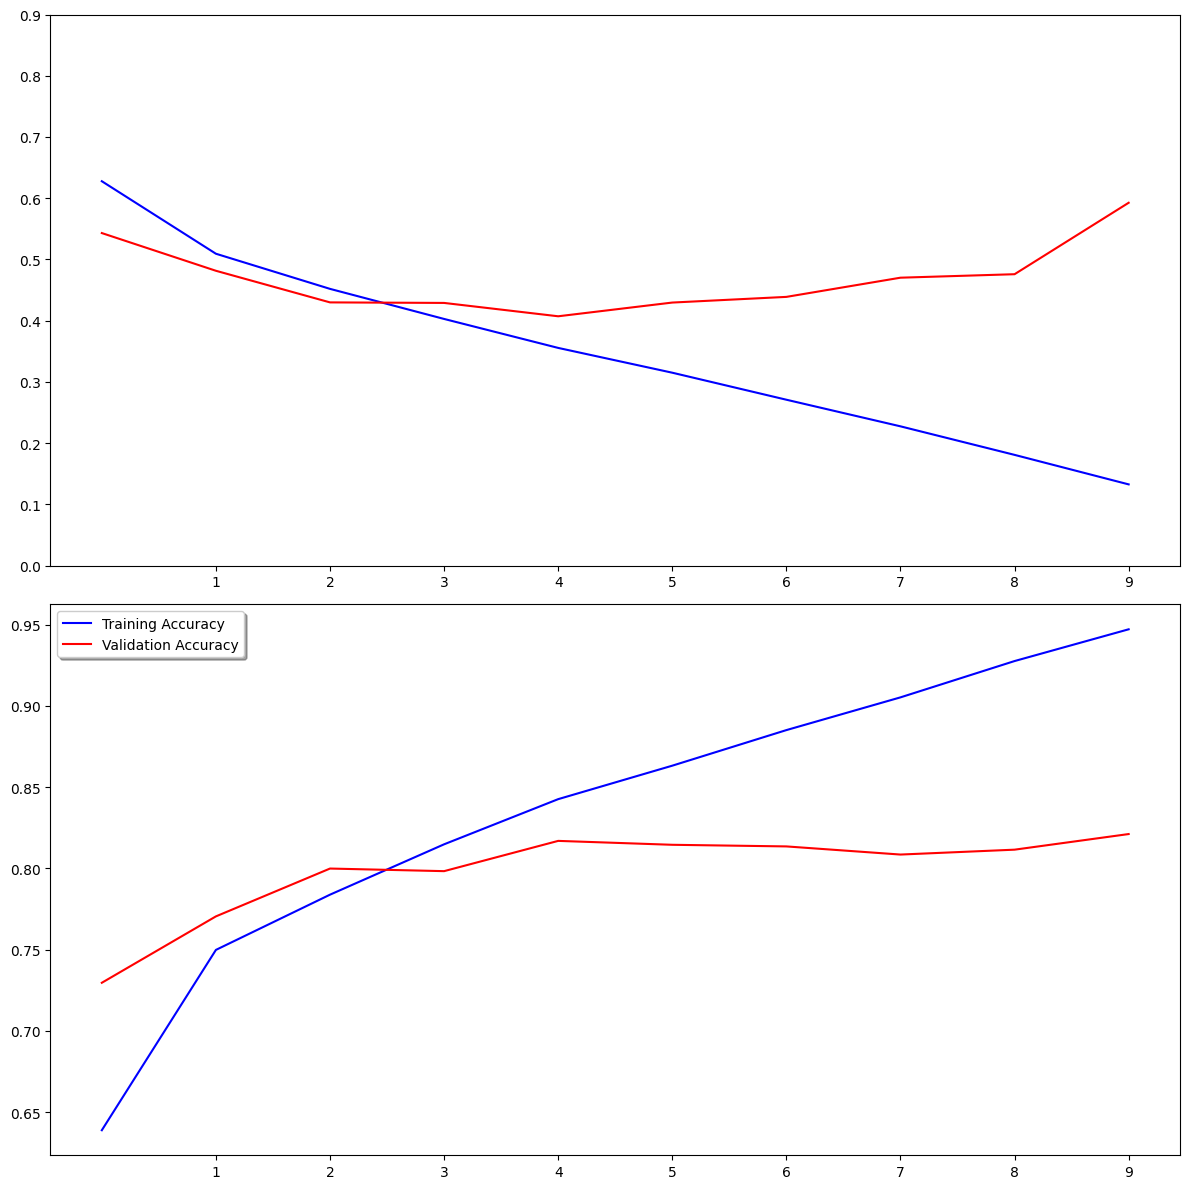

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

ax1.plot(history.history['loss'], color='b', label='Training Loss')
ax1.plot(history.history['val_loss'], color='r', label='Validation Loss')
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [25]:
predict = model.predict_generator(validation_generator, steps=np.ceil(5000/batch_size))

<ipython-input-25-934cd618dc9a>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(validation_generator, steps=np.ceil(5000/batch_size))


In [26]:
validate_df['predicted'] = np.argmax(predict, axis=1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
validate_df['predicted'] = validate_df['predicted'].replace(label_map)
validate_df

,filename,class,predicted
0,dog.11818.jpg,dog,cat
1,dog.6533.jpg,dog,dog
2,cat.6246.jpg,cat,cat
3,dog.7507.jpg,dog,cat
4,dog.12228.jpg,dog,cat
...,...,...,...
4995,dog.1640.jpg,dog,cat
4996,cat.2984.jpg,cat,cat
4997,dog.11827.jpg,dog,dog
4998,cat.6486.jpg,cat,cat


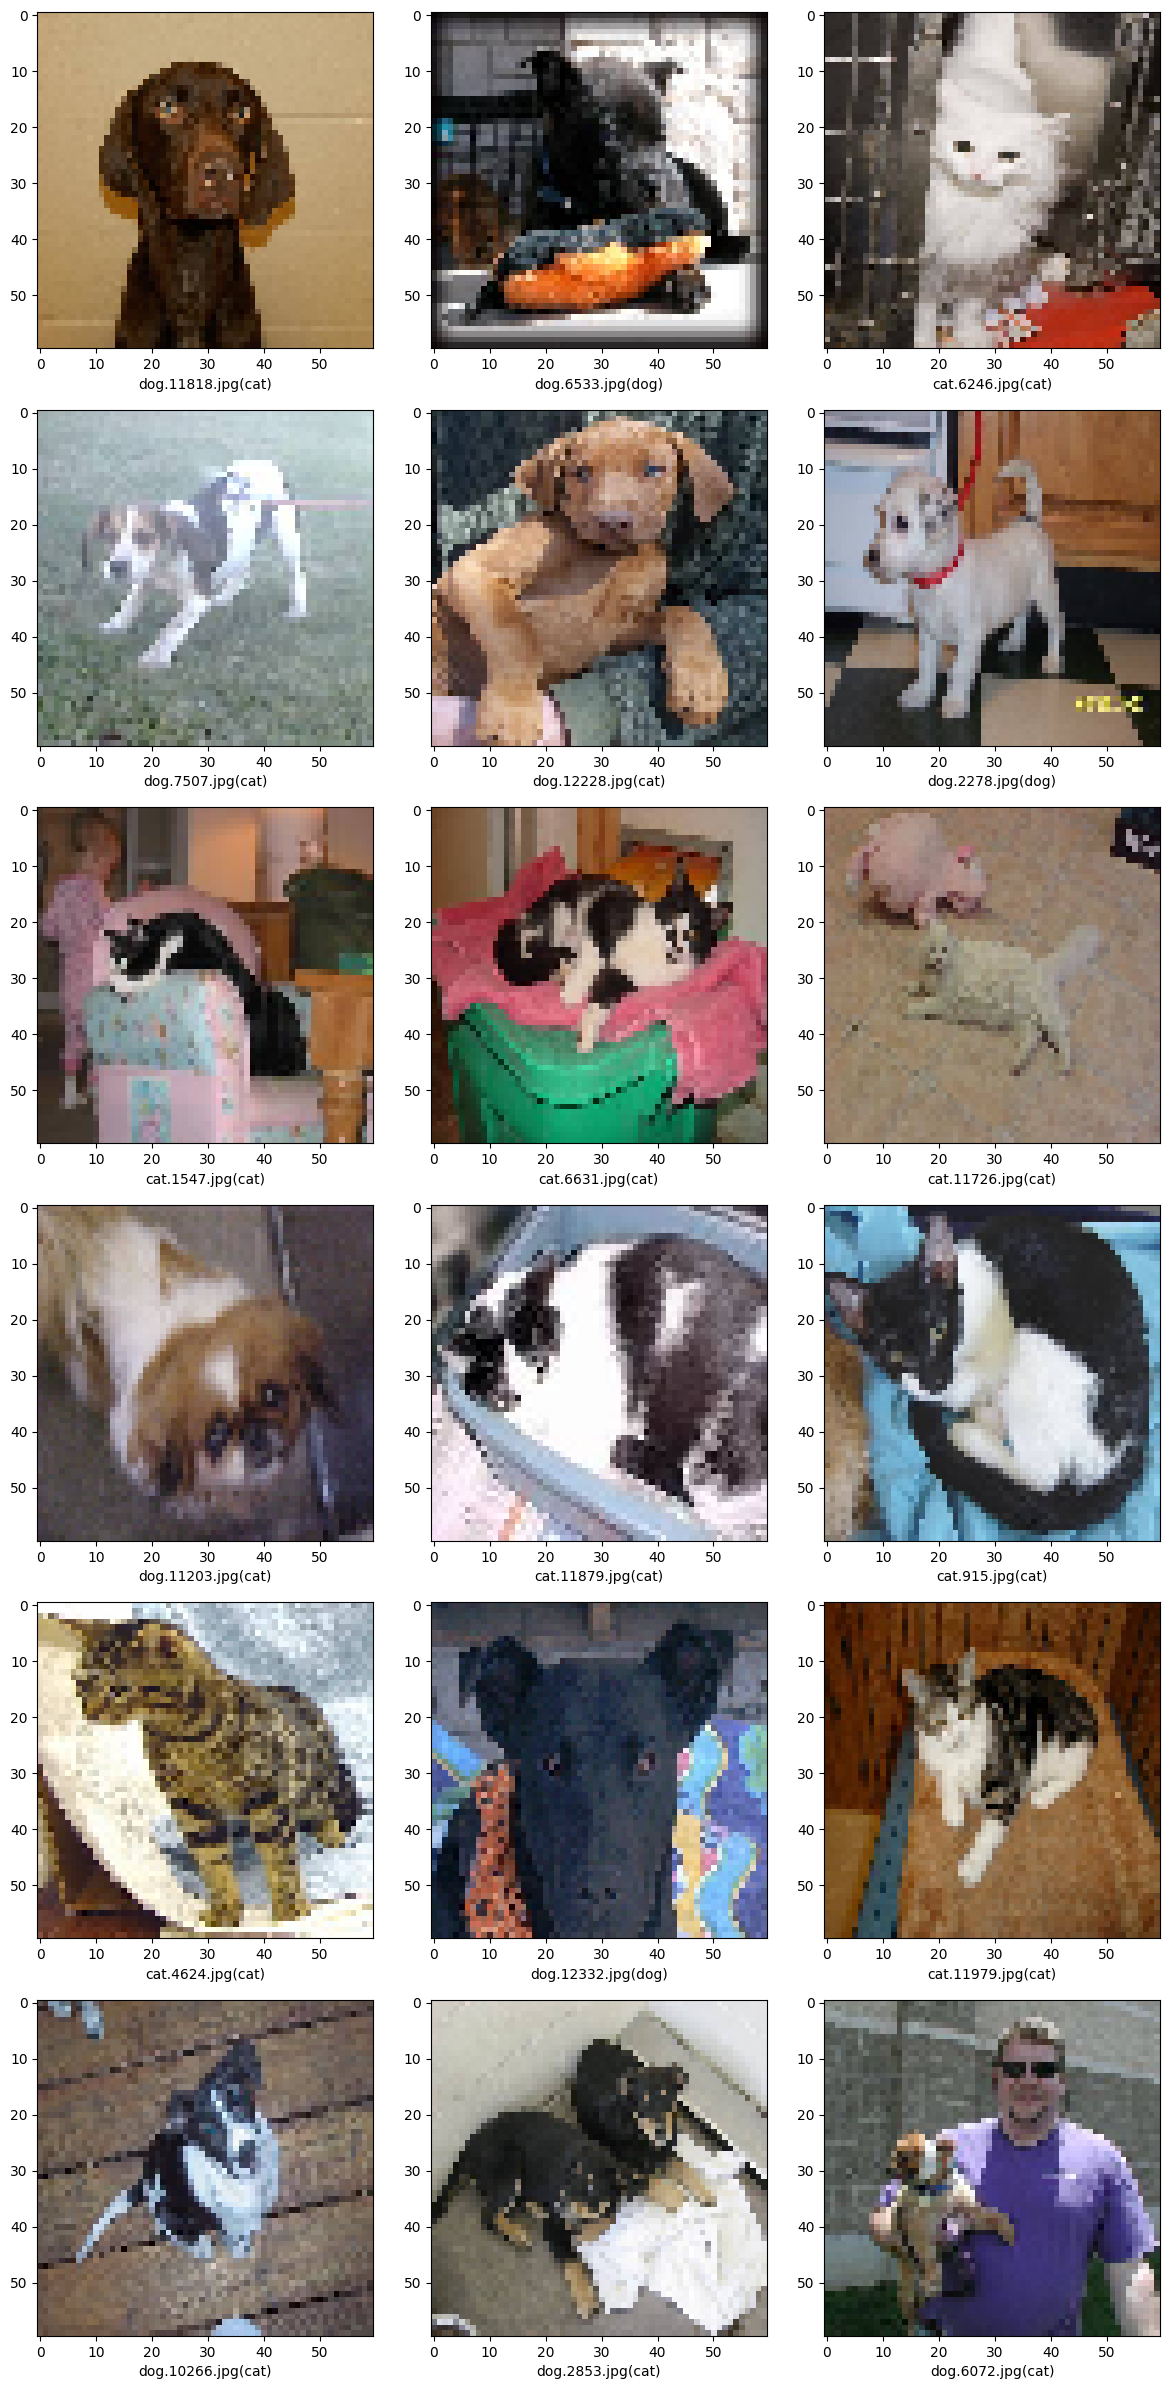

In [30]:
sample_test = validate_df.head(18)
sample_test.head()

plt.figure(figsize=(12,24))

for index, row in sample_test.iterrows():
  filename = row['filename']
  category = row['predicted']
  img = load_img('./train/'+filename, target_size=IMAGE_SIZE)
  plt.subplot(6,3,index+1)
  plt.imshow(img)
  plt.xlabel(filename + '(' + "{}".format(category) + ')')

plt.tight_layout()
plt.show()

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [34]:
checkpoint = ModelCheckpoint('MNIST_Checkpoint.h5',
                             monitor = 'val_loss',
                             mode = 'min',
                             save_best_only = True,
                             verbose = 1)

earlystop = EarlyStopping(monitor = 'vall_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

In [35]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 1, min_delta =  0.0001)

In [36]:
callbacks = [checkpoint, earlystop, reduce_lr]

In [38]:
epochs = 10

history = model.fit(train_generator,
                    epochs=epochs,
                    callbacks = callbacks,
                    validation_data=validation_generator,
                    validation_steps=5000//batch_size,
                    steps_per_epoch=20000//batch_size)

FileNotFoundError: ignored